# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
SWIRE_cat=Table.read('./data/dmu26_XID+PACS_ELAIS-N2_cat.fits')

In [3]:
SWIRE_cat[0:10]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J163354.120+394351.612,248.475501874607,39.7310033402657,19.389559,36.723473,6.37674,9.128418,19.719961,2.5309186,0.000794067,0.0012264469,3.3196167e-05,0.0012500787,0.9985592,0.9984493,2000.0,2000.0,0.0,1.0
HELP_J163352.386+394403.444,248.468276218376,39.7342898946138,27.611212,48.53772,10.395375,3.1805172,8.050185,0.82772666,0.000794067,0.0012264469,3.3196167e-05,0.0012500787,1.0012512,1.0001676,2000.0,2000.0,0.0,1.0
HELP_J163352.492+394246.993,248.468716218376,39.7130536946138,19.835646,40.97127,5.7923427,28.474012,43.19387,14.588883,0.000794067,0.0012264469,3.3196167e-05,0.0012500787,0.99895173,1.00079,2000.0,1118.0,0.0,1.0
HELP_J163352.915+394257.838,248.470479318376,39.7160660946138,15.362442,32.626335,4.803632,8.359196,17.443798,2.2208073,0.000794067,0.0012264469,3.3196167e-05,0.0012500787,1.0028542,1.0011356,2000.0,2000.0,0.0,1.0
HELP_J163350.599+394301.108,248.460827683607,39.71697437126569,17.79864,36.421066,5.0390177,39.620625,53.982338,25.963675,0.000794067,0.0012264469,3.3196167e-05,0.0012500787,0.999915,0.99910337,2000.0,2000.0,0.0,1.0
HELP_J163353.119+394332.116,248.47133095060698,39.7255878742657,34.08253,56.34407,14.974244,52.511333,66.49122,38.22004,0.000794067,0.0012264469,3.3196167e-05,0.0012500787,1.0011331,0.9987118,2000.0,1809.0,0.0,1.0
HELP_J163352.514+394240.707,248.468809963607,39.71130763026569,32.544655,56.017796,12.886926,17.707657,31.812624,6.219413,0.000794067,0.0012264469,3.3196167e-05,0.0012500787,0.999227,1.0016896,2000.0,1334.0,0.0,1.0
HELP_J163355.261+394312.761,248.480254726607,39.7202114822657,14.618176,31.464136,3.9259667,27.757725,46.598953,10.219876,0.000794067,0.0012264469,3.3196167e-05,0.0012500787,1.0015632,1.0026351,2000.0,1371.0,0.0,1.0


In [4]:
SWIRE_cat

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J163354.120+394351.612,248.475501874607,39.7310033402657,19.389559,36.723473,6.37674,9.128418,19.719961,2.5309186,0.000794067,0.0012264469,3.3196167e-05,0.0012500787,0.9985592,0.9984493,2000.0,2000.0,0.0,1.0
HELP_J163352.386+394403.444,248.468276218376,39.7342898946138,27.611212,48.53772,10.395375,3.1805172,8.050185,0.82772666,0.000794067,0.0012264469,3.3196167e-05,0.0012500787,1.0012512,1.0001676,2000.0,2000.0,0.0,1.0
HELP_J163352.492+394246.993,248.468716218376,39.7130536946138,19.835646,40.97127,5.7923427,28.474012,43.19387,14.588883,0.000794067,0.0012264469,3.3196167e-05,0.0012500787,0.99895173,1.00079,2000.0,1118.0,0.0,1.0
HELP_J163352.915+394257.838,248.470479318376,39.7160660946138,15.362442,32.626335,4.803632,8.359196,17.443798,2.2208073,0.000794067,0.0012264469,3.3196167e-05,0.0012500787,1.0028542,1.0011356,2000.0,2000.0,0.0,1.0
HELP_J163350.599+394301.108,248.460827683607,39.71697437126569,17.79864,36.421066,5.0390177,39.620625,53.982338,25.963675,0.000794067,0.0012264469,3.3196167e-05,0.0012500787,0.999915,0.99910337,2000.0,2000.0,0.0,1.0
HELP_J163353.119+394332.116,248.47133095060698,39.7255878742657,34.08253,56.34407,14.974244,52.511333,66.49122,38.22004,0.000794067,0.0012264469,3.3196167e-05,0.0012500787,1.0011331,0.9987118,2000.0,1809.0,0.0,1.0
HELP_J163352.514+394240.707,248.468809963607,39.71130763026569,32.544655,56.017796,12.886926,17.707657,31.812624,6.219413,0.000794067,0.0012264469,3.3196167e-05,0.0012500787,0.999227,1.0016896,2000.0,1334.0,0.0,1.0
HELP_J163355.261+394312.761,248.480254726607,39.7202114822657,14.618176,31.464136,3.9259667,27.757725,46.598953,10.219876,0.000794067,0.0012264469,3.3196167e-05,0.0012500787,1.0015632,1.0026351,2000.0,1371.0,0.0,1.0


## Look at Symmetry of PDFs to determine depth level of catalogue

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


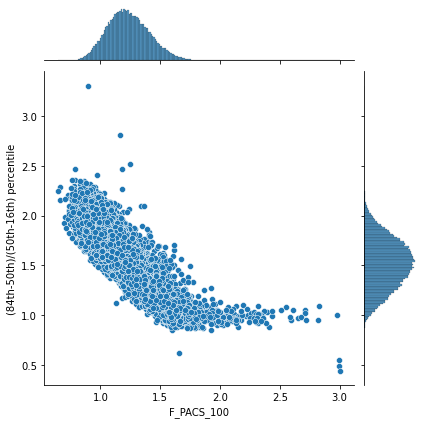

In [7]:
skew=(SWIRE_cat['FErr_PACS_100_u']-SWIRE_cat['F_PACS_100'])/(SWIRE_cat['F_PACS_100']-SWIRE_cat['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_PACS_100']),y=skew, kind='scatter')

g.savefig('../../data/figs/sk_PACS100_ELAIS-N2.png', bbox='tight')
g.savefig('../../data/figs/sk_PACS100_ELAIS-N2.pdf', bbox='tight')

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


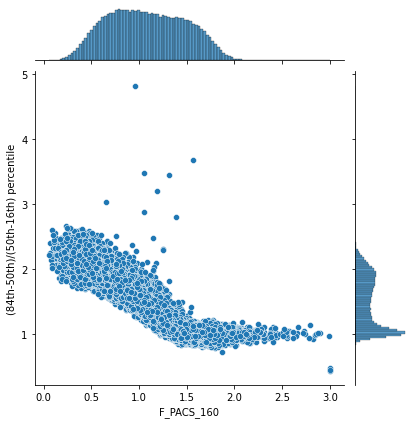

In [9]:
skew=(SWIRE_cat['FErr_PACS_160_u']-SWIRE_cat['F_PACS_160'])/(SWIRE_cat['F_PACS_160']-SWIRE_cat['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(SWIRE_cat['F_PACS_160'][use]),y=skew[use], kind='scatter')

g.savefig('../../data/figs/sk_PACS160_ELAIS-N2.png', bbox='tight')
g.savefig('../../data/figs/sk_PACS160_ELAIS-N2.pdf', bbox='tight')

## Add flag to catalogue

In [13]:
from astropy.table import Column
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_PACS_100'))
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_PACS_160'))


In [14]:
ind_SWIRE_100=(SWIRE_cat['Pval_res_100']>0.5) | (SWIRE_cat['F_PACS_100'] < 12.5) | ((SWIRE_cat['FErr_PACS_100_u']-SWIRE_cat['F_PACS_100'])>150)
ind_SWIRE_160=(SWIRE_cat['Pval_res_160']>0.5) | (SWIRE_cat['F_PACS_160'] < 17.5) | ((SWIRE_cat['FErr_PACS_160_u']-SWIRE_cat['F_PACS_160'])>150)


In [15]:
print(ind_SWIRE_100.sum(),ind_SWIRE_160.sum(),len(SWIRE_cat))

19337 86591 86591


In [16]:
SWIRE_cat['flag_PACS_100'][ind_SWIRE_100]=True
SWIRE_cat['flag_PACS_160'][ind_SWIRE_160]=True

In [18]:
SWIRE_cat.write('./data/dmu26_XID+PACS_ELAIS-N2_cat_20190206.fits', format='fits',overwrite=True)
